# NAIVE BAYES CLASSIFIER ON EMAIL FILTERING

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Spam emails are a major source of in one's inbox, the project's aim is to build a model to classify the emails as spam or not spam.

### b) Defining the Metric for Success

> Attaining a model accuracy of 80% after optimization, and a weighted F1 score > 0.8.

### c) Understanding the context 

> Email filtering relies on correctly identifying commonly used words  in spam emails so that they are flagged and moved to the spam section of the email inbox. 

> Most languages ​​have a large number of words and email messages are always variable, so this variation is taken into account while allowing most, if not all, spam emails to be recognized, with a minimum model accuracy of 80. Set to%.

### d) Recording the Experimental Design

1. Data sourcing/loading.

2. Data Understanding

3. Data Relevance

4. External Dataset Validation

5. Data Preperation

6. Univariate Analysis

7. Bivariate Analysis

8. Multivariate Analysis

9. Modeling: KNN Classification

10. Implementing the solution

11. Challenging the solution

12. Conclusion

13. Follow up questions.

### e) Data Relevance

> The data should contain variables that reasonably contribute to the prediction of the email category. 

> The dataset should result in high accuracy.

## 2. Reading the Data

In [207]:
# let's import the libraries we need to use
from warnings import filterwarnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import os
# Using seaborn style defaults and setting the default figure size
sns.set(rc={'figure.figsize': (30, 5)})
filterwarnings('ignore')
%matplotlib inline


In [209]:
# let's read the data
spam = pd.read_csv('spambase.csv')

## 3. Checking the Data

In [210]:
# Determining the no. of rows and columns in the data
print('The number of rows in the spam data is:', spam.shape[0], 'and the number of columns is:', spam.shape[1])

The number of rows in the spam data is: 4600 and the number of columns is: 58


In [211]:
# Previewing the top of our first dataset
spam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [212]:
# previewing the tail of our first dataset
spam.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [214]:
# Checking whether each column has an appropriate datatype in the first dataset
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

> The data has no missing values.

## 4. External Data Source Validation

> The dataset is available on Kaggle and has been validated.

### a.Validation

## 5. Tidying the Dataset

In [216]:
# let's write a function to check the percentage of missing values in each column
def missing_values_table(df):
    # let's create a for loop to iterate through each column while checking the missing values
    for col in df.columns:
        missing_data = df[col].isnull().sum()
        # let's print the percentage of missing values in each column
        if missing_data > 0:
            print(f'{col} has {missing_data/df.shape[0]*100}% missing values')
        elif missing_data == 0:
            print(f'{col} has no missing values')

In [217]:
# missing values for train
missing_values_table(spam)

0 has no missing values
0.64 has no missing values
0.64.1 has no missing values
0.1 has no missing values
0.32 has no missing values
0.2 has no missing values
0.3 has no missing values
0.4 has no missing values
0.5 has no missing values
0.6 has no missing values
0.7 has no missing values
0.64.2 has no missing values
0.8 has no missing values
0.9 has no missing values
0.10 has no missing values
0.32.1 has no missing values
0.11 has no missing values
1.29 has no missing values
1.93 has no missing values
0.12 has no missing values
0.96 has no missing values
0.13 has no missing values
0.14 has no missing values
0.15 has no missing values
0.16 has no missing values
0.17 has no missing values
0.18 has no missing values
0.19 has no missing values
0.20 has no missing values
0.21 has no missing values
0.22 has no missing values
0.23 has no missing values
0.24 has no missing values
0.25 has no missing values
0.26 has no missing values
0.27 has no missing values
0.28 has no missing values
0.29 ha

> The data has no missing values.

In [218]:
# let's select all categorical columns in the first dataset
categorical_columns = spam.select_dtypes(include=['object']).columns
categorical_columns

Index([], dtype='object')

In [219]:
# let's select all numerical columns from the first dataset and store it in a variable
numerical_cols = spam.select_dtypes(include=['number']).columns
numerical_cols

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38',
       '0.39', '0.40', '0.41', '0.42', '0.43', '0.778', '0.44', '0.45',
       '3.756', '61', '278', '1'],
      dtype='object')

In [220]:
len(numerical_cols)

58

In [221]:
# Checking for Outliers
# let's create a function to check for outliers for each column and print the results as a percentage the the total percentage of the data
# let's create a function that checks for the percentage of outliers in a dataset using Interquartile range

def check_outliers(df):

    # instantiate the quantile variables

    Quantile_1, Quantile_2, Quantile_3 = 0, 0, 0

    # converting to dataframe

    check_outliers = pd.DataFrame()

    # let's get the numerical columns

    num_cols = df.select_dtypes(include=['int64', 'float64'])

    # getting the quantiles from the numerical columns

    Quantile_1 = num_cols.quantile(0.25)

    Quantile_3 = num_cols.quantile(0.75)

    # let's get the IQR

    IQR = Quantile_3 - Quantile_1

    # let's get the outliers

    check_outliers = num_cols[((num_cols < (
        Quantile_1 - 1.5 * IQR)) | (num_cols > (Quantile_3 + 1.5 * IQR))).any(axis=1)]

    # printing the number of outliers and the percentage of outliers

    print('There are {} outliers in the dataset.'.format(
        check_outliers.shape[0]))

    print('The percentage of outliers in the dataset is {}%.'.format(
        round((check_outliers.shape[0] / df.shape[0]) * 100, 2)))


In [222]:
# checking for outliers in the first dataset
check_outliers(spam)

There are 4424 outliers in the dataset.
The percentage of outliers in the dataset is 96.17%.


> The first dataframe has 96.17% of outliers

> We wont drop any outlier because it is a crucial dataset.

In [223]:
# checking for duplicates in the first dataset
spam.duplicated().sum()

391

In [224]:
# let's drop the duplicates in the dataset
spam.drop_duplicates(inplace=True)

In [225]:
# let's see the duplicates again
spam.duplicated().sum()

0

In [226]:
# More data cleaning procedures
# let's check if the columns have been named correctly
# spam.columns

# let's rename the columns as per the description of the dataset
column = """word_freq_make, word_freq_address, word_freq_all, word_freq_3d, 
word_freq_our, word_freq_over, word_freq_remove, word_freq_internet, 
word_freq_order, word_freq_mail, word_freq_receive, word_freq_will, 
word_freq_people, word_freq_report, word_freq_addresses, word_freq_free,
word_freq_business, word_freq_email, word_freq_you, word_freq_credit,
word_freq_your, word_freq_font, word_freq_000, word_freq_money, word_freq_hp,
word_freq_hpl, word_freq_george, word_freq_650, word_freq_lab, word_freq_labs,
word_freq_telnet, word_freq_857, word_freq_data,  word_freq_415, word_freq_85,
word_freq_technology, word_freq_1999, word_freq_parts, word_freq_pm,
word_freq_direct, word_freq_cs, word_freq_meeting, word_freq_original,
word_freq_project, word_freq_re, word_freq_edu, word_freq_table, 
word_freq_conference, char_freq_;, char_freq_(, char_freq_[, char_freq_!,
char_freq_$, char_freq_#,  capital_run_length_average,
capital_run_length_longest, capital_run_length_total, spam """


In [231]:
spam_copy = spam.copy()

In [ ]:
# let's split the column names to a list
column = column.split(',')
type(column)

In [233]:
# let's change the column names
print(f'Dataset = {len(spam.columns)}')
print(f'Description = {len(column)}')


Dataset = 58
Description = 58


> The columns of the main dataset are of same length to the length of the column list so merging will be done for easy reading of columns.

In [234]:
# let's append the column names to the dataset
spam_copy.columns = column

# let's preview the dataset
spam_copy.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,\nword_freq_our,word_freq_over,word_freq_remove,word_freq_internet,\nword_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,\nchar_freq_$,char_freq_#,capital_run_length_average,\ncapital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [235]:
# let's preview the columns
spam_copy.columns

Index(['word_freq_make', ' word_freq_address', ' word_freq_all',
       ' word_freq_3d', ' \nword_freq_our', ' word_freq_over',
       ' word_freq_remove', ' word_freq_internet', ' \nword_freq_order',
       ' word_freq_mail', ' word_freq_receive', ' word_freq_will',
       ' \nword_freq_people', ' word_freq_report', ' word_freq_addresses',
       ' word_freq_free', '\nword_freq_business', ' word_freq_email',
       ' word_freq_you', ' word_freq_credit', '\nword_freq_your',
       ' word_freq_font', ' word_freq_000', ' word_freq_money',
       ' word_freq_hp', '\nword_freq_hpl', ' word_freq_george',
       ' word_freq_650', ' word_freq_lab', ' word_freq_labs',
       '\nword_freq_telnet', ' word_freq_857', ' word_freq_data',
       '  word_freq_415', ' word_freq_85', '\nword_freq_technology',
       ' word_freq_1999', ' word_freq_parts', ' word_freq_pm',
       '\nword_freq_direct', ' word_freq_cs', ' word_freq_meeting',
       ' word_freq_original', '\nword_freq_project', ' word_freq_

> The columns were appended successfully.

In [243]:
# let's remove special characters from the dataset column names
import re
spam_copy.columns = [re.sub(r'[^\w]', '', col) for col in spam_copy.columns]

In [244]:
# let's preview the column names
spam_copy.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


> The columns have been properly named.

## 6. Exploratory Analysis

#### *a) Univariate Analysis*

In [30]:
# let's select all categorical columns
categorical_columns

Index([], dtype='object')

> The data has no categorical variables.

In [31]:
# let's select all numerical columns
numerical_cols

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38',
       '0.39', '0.40', '0.41', '0.42', '0.43', '0.778', '0.44', '0.45',
       '3.756', '61', '278', '1'],
      dtype='object')

In [253]:
# let's create a function for plotting the categorical data
def plot_categorical(column, df):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(df[column], orient='v')
    plt.title('Bar Plot of {}'.format(column))
    # let's add a color to our bars
    plt.setp(ax.patches, alpha=0.6, linewidth=1, edgecolor='black')

    plt.xlabel('{}'.format(column))
    plt.ylabel('Count')
    plt.show()

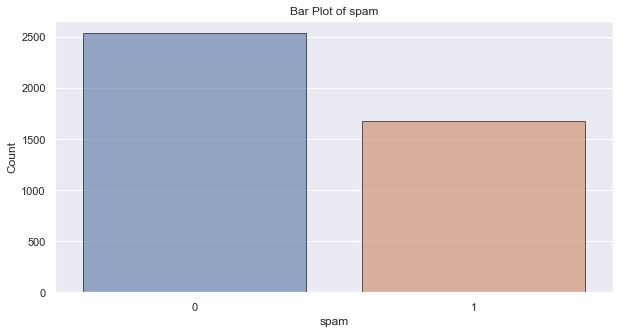

In [254]:
# let's plot bar plot email status
plot_categorical('spam', spam_copy)

> Most of the mails are not spam but rather legitimate and real.

#### *b) Bivariate Analysis*

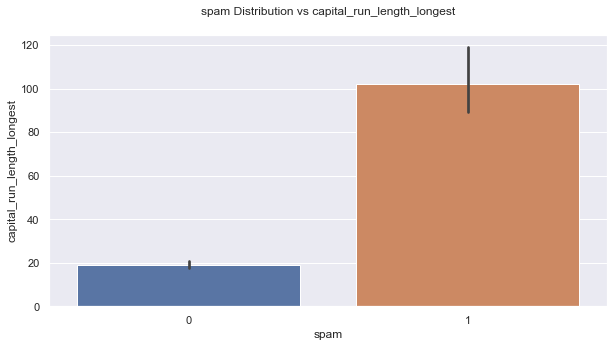

In [260]:
# let's plot a bar plot of spam vs capital_run_length_longest
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(spam_copy['spam'],
            spam_copy['capital_run_length_longest'])
plt.title('spam Distribution vs capital_run_length_longest', fontsize=12, y=1.05)
plt.xlabel('spam')
plt.ylabel('capital_run_length_longest')
plt.show()


> The bar plot suggests that most spam emails have a higher length of longest uninterrupted sequence of capital letters than legitimate emails.

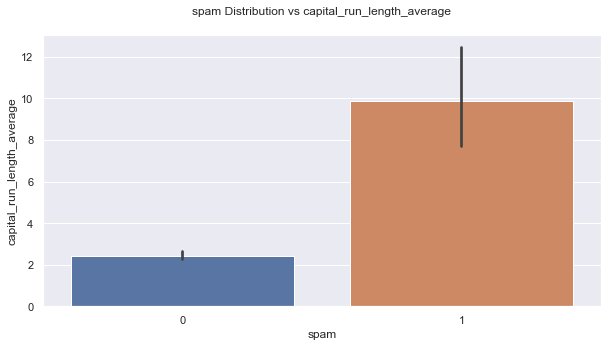

In [259]:
# let's plot a bar plot of spam vs average length of uninterupted sequence of capital letters
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(spam_copy['spam'],
            spam_copy['capital_run_length_average'])
plt.title('spam Distribution vs capital_run_length_average', fontsize=12, y=1.05)
plt.xlabel('spam')
plt.ylabel('capital_run_length_average')
plt.show()


> From the above plot most spam emails have a higher average length of uninterrupted sequences of capital letters than legitimate emails.

#### *c) Multivariate Analysis*

In [264]:
# let's get the correlation matrix
corr = spam_copy.corr()
corr

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_,char_freq_,char_freq_,char_freq_,char_freq_,char_freq_,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,...,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
word_freq_address,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,...,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
word_freq_all,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,...,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
word_freq_3d,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,...,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
word_freq_our,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,...,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
word_freq_over,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,...,-0.021758,-0.011628,-0.016743,0.058173,0.105903,0.020405,-0.013559,0.065714,0.063402,0.212455
word_freq_remove,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,...,-0.034092,-0.061357,-0.029478,0.051036,0.067215,0.049300,0.039171,0.050828,-0.017082,0.334605
word_freq_internet,-0.004392,0.013781,0.007263,0.003798,0.023410,0.079683,0.033675,1.000000,0.106872,0.079023,...,-0.028986,-0.042785,-0.021393,0.029069,0.053550,-0.008128,0.009974,0.035606,0.036894,0.200780
word_freq_order,0.103818,0.053525,0.077618,-0.001044,0.014482,0.097012,0.049216,0.106872,1.000000,0.123341,...,-0.015016,-0.037420,0.017308,0.035985,0.152436,-0.002084,0.110786,0.166304,0.233199,0.221591
word_freq_mail,0.040799,0.184441,0.025201,-0.003849,0.027232,0.010068,0.055670,0.079023,0.123341,1.000000,...,0.006757,-0.005008,0.003785,0.031657,0.077378,0.034473,0.073125,0.101552,0.078587,0.131822


> There are columns with high correlation, we will drop columns with high VIF.

In [276]:
# the lda function
def Lda(X_train, X_test, y_train, components=None):
  lda = LDA(n_components=components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  return X_train, X_test

In [277]:
# the standardization function
def Standardization(X_train, X_test):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return X_train, X_test


## 7. Modeling.

In [262]:
###### Multicolinearity #########################
#################################################

In [265]:
# let's create a function to get the vif

def VIF(data):
  # Correlation matrix
  correlation = data.corr()
  # Inverse matrix
  inv_corr = pd.DataFrame(np.linalg.inv(
      correlation.values), index=correlation.index, columns=correlation.columns)
  return inv_corr


In [266]:
# vif
VIF(spam_copy)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_,char_freq_,char_freq_,char_freq_,char_freq_,char_freq_,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.101458,-0.004343,-0.016145,-0.001582,0.007169,-0.013952,0.032990,0.048524,-0.061777,-0.005264,...,0.010817,-0.007665,0.021817,-0.019666,-0.017907,0.007055,-0.031555,0.008607,-0.040004,0.017730
word_freq_address,-0.004343,1.107817,0.003987,0.016084,-0.010216,0.016060,-0.037317,0.015461,-0.005931,-0.189291,...,-0.029028,0.044135,0.017029,-0.003999,-0.016102,-0.027818,0.001418,-0.037395,-0.004283,-0.013206
word_freq_all,-0.016145,0.003987,1.096680,0.026662,-0.011343,-0.015893,0.037546,0.033653,-0.020949,0.023755,...,0.004197,-0.012480,0.011978,-0.057653,0.011569,0.008140,-0.089965,-0.006775,-0.000350,-0.074379
word_freq_3d,-0.001582,0.016084,0.026662,1.009500,0.010171,0.021308,0.001602,0.002119,0.011524,0.002532,...,0.008906,0.023784,0.006359,0.014300,0.007655,0.010410,0.013072,-0.033479,-0.003149,-0.082515
word_freq_our,0.007169,-0.010216,-0.011343,0.010171,1.139513,0.001455,-0.046251,0.041113,0.048877,0.005028,...,-0.007992,0.023241,0.000160,0.047230,0.032292,0.007431,-0.036319,-0.023988,0.059190,-0.251117
word_freq_over,-0.013952,0.016060,-0.015893,0.021308,0.001455,1.087237,0.015486,-0.037747,-0.037747,0.041163,...,0.004692,-0.013586,-0.000408,-0.012403,-0.003162,-0.012458,0.053647,-0.035215,0.020650,-0.145372
word_freq_remove,0.032990,-0.037317,0.037546,0.001602,-0.046251,0.015486,1.196452,0.074339,0.022546,-0.003140,...,-0.007133,0.032612,0.002865,0.037809,0.018165,-0.038203,-0.000692,-0.053242,0.120066,-0.383276
word_freq_internet,0.048524,0.015461,0.033653,0.002119,0.041113,-0.037747,0.074339,1.118979,-0.028860,-0.039179,...,-0.001394,0.020930,0.014466,0.018108,0.024783,0.009236,0.015730,-0.007150,0.027873,-0.162216
word_freq_order,-0.061777,-0.005931,-0.020949,0.011524,0.048877,-0.037747,0.022546,-0.028860,1.197592,-0.054127,...,-0.016513,0.070438,-0.037721,0.012549,-0.069507,0.004620,-0.058382,-0.020635,-0.174571,-0.083220
word_freq_mail,-0.005264,-0.189291,0.023755,0.002532,0.005028,0.041163,-0.003140,-0.039179,-0.054127,1.122141,...,-0.017756,0.005395,-0.019412,-0.004916,-0.011801,-0.031505,-0.048508,-0.023874,-0.006003,-0.020374


> There isn't any VIF above 5 so we can safely say that there is no multicollinearity.

### • Model with 80-20 splits

* Without Optimization

In [268]:
# let's use get dummies to create dummy variables
spam_copy = pd.get_dummies(spam_copy)
spam_copy.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_,char_freq_,char_freq_,char_freq_,char_freq_,char_freq_,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [270]:
# let's select our xand y variables
X = spam_copy.drop(['spam'], axis=1)
y = spam_copy.spam

# let's split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [271]:
# train the model
clf = GaussianNB()
model = clf.fit(X_train, y_train)

In [272]:
# predict the test set
y_pred = model.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,842.000000,842.000000
mean,0.426366,0.549881
std,0.494842,0.497801
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [273]:
# classification report
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       483
           1       0.74      0.96      0.84       359

    accuracy                           0.84       842
   macro avg       0.85      0.86      0.84       842
weighted avg       0.87      0.84      0.84       842



In [274]:
# evaluation using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[364 119]
 [ 15 344]]
Accuracy 0.8408551068883611


> With an 80-20 split, our accuracy is 84%

### • KNN 80-20 with optimization

In [278]:
# let's get our x and y
X = spam_copy.drop('spam', axis=1)
y = spam_copy.spam

# let's get our train-test-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [280]:
# optimization and standardization
X_train, X_test = Standardization(X_train, X_test)

X_train, X_test = Lda(X_train, X_test, y_train, components=None)

clf = GaussianNB()
model = clf.fit(X_train, y_train)


In [281]:
# let's predict based on the model we've trained
y_pred = model.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()


,Actual,Predicted
count,842.000000,842.000000
mean,0.412114,0.357482
std,0.492508,0.479543
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [282]:
# let's create a classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       495
           1       0.93      0.81      0.87       347

    accuracy                           0.90       842
   macro avg       0.91      0.88      0.89       842
weighted avg       0.90      0.90      0.90       842



In [283]:
# evaluation using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))


[[475  20]
 [ 66 281]]
Accuracy 0.8978622327790974


> With an 80-20 split, our accuracy is 89.7%

### • KNN 70-30

* Without Optimization

In [285]:
# let's our x and y
X = spam_copy.drop('spam', axis=1)
y = spam_copy.spam

# let's get our train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [286]:
# train the model
clf = GaussianNB()
model = clf.fit(X_train, y_train)


In [287]:
# predict the test set
y_pred = model.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()


,Actual,Predicted
count,1263.000000,1263.000000
mean,0.416469,0.559778
std,0.493168,0.496610
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [288]:
# let's create our classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       737
           1       0.72      0.96      0.82       526

    accuracy                           0.83      1263
   macro avg       0.84      0.84      0.82      1263
weighted avg       0.86      0.83      0.83      1263



In [289]:
# let's evaluate our model
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[536 201]
 [ 20 506]]
Accuracy 0.8250197941409343


> The 70-30 model gives a 82% accuracy score.

### • KNN 70-30 with optimization

In [292]:
# let's get our x and y
X = spam_copy.drop('spam', axis=1)
y = spam_copy.spam

# let's get our train-test-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)


In [293]:
# optimization and standardization
X_train, X_test = Standardization(X_train, X_test)

X_train, X_test = Lda(X_train, X_test, y_train, components=None)

clf = GaussianNB()
model = clf.fit(X_train, y_train)


In [295]:
# let's predict based on the model we've trained
y_pred = model.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()


,Actual,Predicted
count,1263.000000,1263.000000
mean,0.416469,0.361045
std,0.493168,0.480494
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [296]:
# let's create a classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.87      0.96      0.91       737
           1       0.93      0.81      0.87       526

    accuracy                           0.90      1263
   macro avg       0.90      0.88      0.89      1263
weighted avg       0.90      0.90      0.89      1263



In [297]:
# evaluation using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))


[[706  31]
 [101 425]]
Accuracy 0.8954869358669834


> The 70-30 model with optimization gives a 89.5% accuracy score.

### • KNN 60-40

In [298]:
# let's get our x and y
X = spam_copy.drop('spam', axis=1)
y = spam_copy.spam

# let's get our train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [299]:
# train the model
clf = GaussianNB()
model = clf.fit(X_train, y_train)


In [300]:
# predict the test set
y_pred = model.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()


,Actual,Predicted
count,1684.000000,1684.000000
mean,0.409739,0.547506
std,0.491932,0.497886
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [301]:
# classification report
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.96      0.74      0.84       994
           1       0.72      0.96      0.82       690

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.86      0.83      0.83      1684



In [302]:
# evaluation using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))


[[735 259]
 [ 27 663]]
Accuracy 0.830166270783848


> A 60-40 split gives a 83% accuracy

### • KNN 60-40 with optimization

In [303]:
# let's get our x and y
X = spam_copy.drop('spam', axis=1)
y = spam_copy.spam

# let's get our train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [306]:
# train the model
clf = GaussianNB()
model = clf.fit(X_train, y_train)


In [307]:
# let's conduct standardization
X_train, X_test = Standardization(X_train, X_test)

# let's perform lda
X_train, X_test = Lda(X_train, X_test, y_train, components=None)

In [309]:
# predict the test set
y_pred = model.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()


,Actual,Predicted
count,1684.000000,1684.000000
mean,0.409739,0.366390
std,0.491932,0.481961
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [310]:
# let's create a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       994
           1       0.92      0.82      0.87       690

    accuracy                           0.90      1684
   macro avg       0.90      0.88      0.89      1684
weighted avg       0.90      0.90      0.90      1684



In [311]:
# evaluation using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[943  51]
 [124 566]]
Accuracy 0.8960807600950119


> A 60-40 split with optimization gives a 89% accuracy

#### Conclusion

> *The best model to use is the 80-20 split with optimization. It gives a 89.7% accuracy.*

## 8. Challenging the solution

> The solution has been challenged above by using different splits.

## 9. Follow up questions

### a). Did we have the right data?

> Yes, we had the right data. It was a very good dataset.

### b). Do we need other data to answer our question?

> No, we don't need other data to answer our question.

### c). Did we have the right question?

> Yes, we had the right question.